In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt



# Elastic Net

In [58]:
data_raw = pd.read_csv('data_olahan_3.csv')
data_raw

,Company,Tahun_Buku,Tanggal Rilis,kas,jumlah_aset_lancar,piutang,jumlah_aset_tidak_lancar,jumlah_aset,jumlah_liabilitas_jangka_pendek,jumlah_liabilitas_jangka_panjang,...,AR_Turnover_in_Days,Aset_Turnover,debt_to_equity,equity_ratio,debt_ratio,gpm,net_profit_margin,roa,roce,share_amount
0,NICK,2021,2022-03-14 10:08:00,1.151513e+10,3.043375e+11,1.000000e-06,1.096604e+10,3.153035e+11,8.257848e+08,1.980080e+08,...,1.671185e-15,0.692691,0.003258,0.996753,0.003247,0.990364,0.990644,0.686210,0.687818,6.511500e+08
1,AALI,2020,2021-02-24 14:27:00,9.788920e+05,5.937890e+06,1.513218e+06,2.184334e+07,2.778123e+07,1.792506e+06,6.740931e+06,...,2.936796e+01,0.676969,0.443346,0.692834,0.307166,0.077771,0.024845,0.016819,0.056280,1.924688e+09
2,ACST,2020,2021-02-24 14:37:00,7.340000e+04,8.791300e+04,8.511470e+05,2.967193e+06,3.055106e+06,3.460400e+04,2.696470e+06,...,2.579385e+02,0.394235,8.428408,0.106062,0.893938,-1.114453,-1.110075,-0.437630,-0.444389,1.267516e+10
3,ADMF,2020,2021-02-18 12:43:00,7.617200e+04,5.002878e+06,2.274517e+07,2.422764e+07,2.923051e+07,1.628666e+07,5.018575e+06,...,9.386586e+02,0.302578,2.688265,0.271130,0.728870,0.166932,0.114773,0.034728,0.114065,1.000000e+08
4,AMFG,2020,2021-04-16 16:16:00,2.989810e+05,1.932986e+06,4.500070e+05,6.028671e+06,7.961657e+06,2.404568e+06,2.627252e+06,...,4.359388e+01,0.473242,1.717440,0.367993,0.632007,-0.123613,-0.127421,-0.060301,-0.083812,4.340000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,ZINC,2022,2023-06-26 21:49:00,5.346490e+10,6.777764e+11,4.375605e+11,1.798178e+12,2.475954e+12,7.080128e+11,9.948196e+11,...,2.226409e+02,0.289723,2.202541,0.312252,0.687748,-0.179672,-0.159128,-0.046103,-0.072902,2.525000e+10
2369,ZONE,2022,2023-04-03 15:09:00,4.910326e+09,3.747793e+11,4.837608e+10,2.770019e+11,6.517812e+11,1.991748e+11,1.057582e+11,...,2.624128e+01,1.032373,0.879154,0.532154,0.467846,0.144271,0.107514,0.110994,0.214485,8.701715e+08
2370,ZYRX,2022,2023-05-02 13:37:00,2.063763e+11,6.232536e+11,1.323574e+11,8.397621e+10,7.072298e+11,4.322842e+11,6.656257e+09,...,6.271068e+01,1.089278,1.636071,0.379352,0.620648,0.131564,0.102199,0.111323,0.368629,1.333335e+09
2371,JKSW,2020,2021-06-04 08:54:00,8.820607e+09,5.947902e+10,4.100464e+10,1.098151e+11,1.692941e+11,2.023736e+10,6.459183e+11,...,2.953282e+04,0.002993,-1.340727,-2.934902,3.934902,-17.044078,-2.234855,-0.006690,-0.057949,1.500000e+08


In [59]:
data_raw = data_raw[["per","current_ratio","cash_ratio","AR_Turnover","AR_Turnover_in_Days","Aset_Turnover","debt_to_equity","equity_ratio","debt_ratio","gpm","net_profit_margin","roa","roce"]]
data_raw.replace({np.inf: 0.0000000001, -np.inf: -0.0000000001}, inplace=True)
data_raw

C:\Users\arsen\AppData\Local\Temp\ipykernel_15132\540589478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw.replace({np.inf: 0.0000000001, -np.inf: -0.0000000001}, inplace=True)


,per,current_ratio,cash_ratio,AR_Turnover,AR_Turnover_in_Days,Aset_Turnover,debt_to_equity,equity_ratio,debt_ratio,gpm,net_profit_margin,roa,roce
0,2.164695e+00,368.543350,13.944473,2.184079e+17,1.671185e-15,0.692691,0.003258,0.996753,0.003247,0.990364,0.990644,0.686210,0.687818
1,4.142931e+07,3.312619,0.546102,1.242851e+01,2.936796e+01,0.676969,0.443346,0.692834,0.307166,0.077771,0.024845,0.016819,0.056280
2,-3.626875e+06,2.540544,2.121142,1.415066e+00,2.579385e+02,0.394235,8.428408,0.106062,0.893938,-1.114453,-1.110075,-0.437630,-0.444389
3,6.806949e+05,0.307176,0.004677,3.888528e-01,9.386586e+02,0.302578,2.688265,0.271130,0.728870,0.166932,0.114773,0.034728,0.114065
4,-3.071051e+06,0.803881,0.124339,8.372734e+00,4.359388e+01,0.473242,1.717440,0.367993,0.632007,-0.123613,-0.127421,-0.060301,-0.083812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,-1.225490e+01,0.957294,0.075514,1.639411e+00,2.226409e+02,0.289723,2.202541,0.312252,0.687748,-0.179672,-0.159128,-0.046103,-0.072902
2369,1.424320e+01,1.881660,0.024653,1.390938e+01,2.624128e+01,1.032373,0.879154,0.532154,0.467846,0.144271,0.107514,0.110994,0.214485
2370,5.034037e+00,1.441768,0.477409,5.820380e+00,6.271068e+01,1.089278,1.636071,0.379352,0.620648,0.131564,0.102199,0.111323,0.368629
2371,-8.438819e+00,2.939071,0.435858,1.235913e-02,2.953282e+04,0.002993,-1.340727,-2.934902,3.934902,-17.044078,-2.234855,-0.006690,-0.057949


In [60]:
y = data_raw[['per']]
X = data_raw.drop(['per'], axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = ElasticNet(alpha=0.2, l1_ratio=0.5, random_state=42)

In [63]:
model.fit(X_train, y_train)

c:\Users\arsen\anaconda3\envs\skripsi\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+18, tolerance: 2.011e+14
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.2, random_state=42)

In [64]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4017540925976.601


# Neural Network

In [65]:
regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=5000, activation='relu', solver='adam', random_state=42)

# 3. Training
# Train the neural network
regressor.fit(X_train, y_train)

# 4. Evaluation
# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")




c:\Users\arsen\anaconda3\envs\skripsi\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 1607083280663.92


In [66]:
print(len(y_pred))
print(len(y_test))
print(len(X_test))
print(len(X_train))
X_test


475
475
475
1898


,current_ratio,cash_ratio,AR_Turnover,AR_Turnover_in_Days,Aset_Turnover,debt_to_equity,equity_ratio,debt_ratio,gpm,net_profit_margin,roa,roce
834,1.259204,0.062895,1.915871,190.513837,0.196860,0.569023,0.637339,0.362661,-0.341200,-0.328421,-0.064653,-0.080135
1509,2.327778,0.246840,8.529349,42.793419,3.503609,0.933420,0.517218,0.482782,0.050995,0.041302,0.144707,0.291786
100,0.942976,0.019921,0.110198,3312.227217,0.067659,6.121405,0.126595,0.774937,0.418189,0.336364,0.022758,0.131010
1844,0.881145,0.247353,18.076031,20.192486,0.559906,1.211845,0.452111,0.547889,0.205793,0.155879,0.087278,0.151220
56,2.937345,0.478664,8.054208,45.317924,2.638640,0.421065,0.703698,0.296302,0.042220,0.033176,0.087540,0.155682
...,...,...,...,...,...,...,...,...,...,...,...,...
457,6.166799,1.941560,4.946046,73.796328,0.575386,0.102397,0.907114,0.092886,0.046315,0.035099,0.020196,0.028274
2204,2.099339,1.024547,7.692047,47.451608,0.952754,0.540499,0.649140,0.350860,0.145554,0.109346,0.104180,0.162819
2010,3.498807,0.349655,2.819217,129.468587,0.597243,0.441610,0.693669,0.306331,0.018331,0.021995,0.013137,0.013645
1404,1.296193,0.189539,4.928826,74.054150,0.782081,3.824769,0.207264,0.792736,0.013974,0.015016,0.011744,0.015894


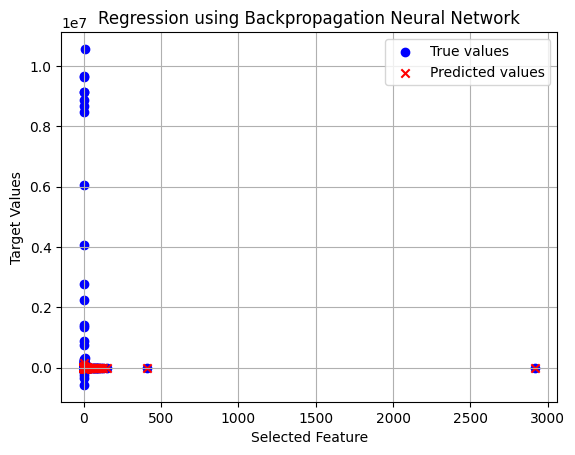

In [67]:
# If X_test is a DataFrame, select the first column for visualization
feature_to_plot = X_test.iloc[:, 0].values

plt.scatter(feature_to_plot, y_test, color='blue', label='True values')
plt.scatter(feature_to_plot, y_pred, color='red', marker='x', label='Predicted values')
plt.legend()
plt.title('Regression using Backpropagation Neural Network')
plt.xlabel('Selected Feature')
plt.ylabel('Target Values')
plt.grid(True)
plt.show()


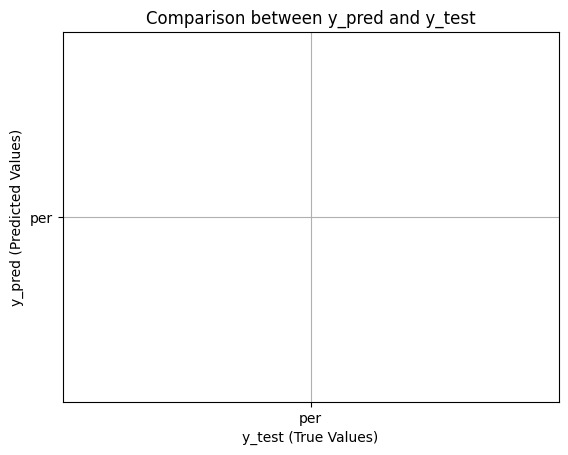

In [68]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line of identity

plt.title('Comparison between y_pred and y_test')
plt.xlabel('y_test (True Values)')
plt.ylabel('y_pred (Predicted Values)')
plt.grid(True)
plt.show()